In [1]:
import pandas as pd
from ggplot import *

project_id = "the-d-team-164512"

In [2]:
query ="""\
SELECT
  c.ChronicIllness AS illness
  , DATE(STRFTIME_UTC_USEC(DATE(t.Dispense_Week), "%Y-%m-01")) AS year_month
  , SUM(pcd.distance) AS sum_distance
  , SUM(t.PatientPrice_Amt) AS sum_price
  , count(*) AS transaction_count
FROM [the-d-team-164512:dthon.transactions] t
JOIN [the-d-team-164512:dthon.chronic_illness_lookup] c
    ON t.Drug_ID = c.MasterProductID
JOIN dthon.patients_lookup p
    ON t.patient_id = p.patient_id
JOIN dthon.stores_lookup s
    ON s.store_id = t.store_id
JOIN dthon.postcode_distances pcd
    ON p.postcode = pcd.from_postcode AND s.postcode = pcd.to_postcode
GROUP BY
  illness
  , year_month
ORDER BY
  illness
  , year_month ASC
  """

df_ill = pd.read_gbq(query, project_id)
df_ill.year_month = pd.Series(df_ill.year_month).apply(pd.to_datetime, format='%Y-%m')
df_ill.head(3)

Waiting for job to complete...
Waiting for job to complete...
Waiting for job to complete...


,illness,year_month,sum_distance,sum_price,transaction_count
0,Anti-Coagulant,2011-01-01,20272.236161,4472.41,603
1,Anti-Coagulant,2011-02-01,13365.864813,4493.65,653
2,Anti-Coagulant,2011-03-01,40535.312416,4719.95,689


## Distance per illness
a clear standout is on Immunology? why?
also Depression is sitting generally higher then the rest? is there some kind of stigma where depressed people do not want to use local pharmacies? hence not letting their local community know of their depression?

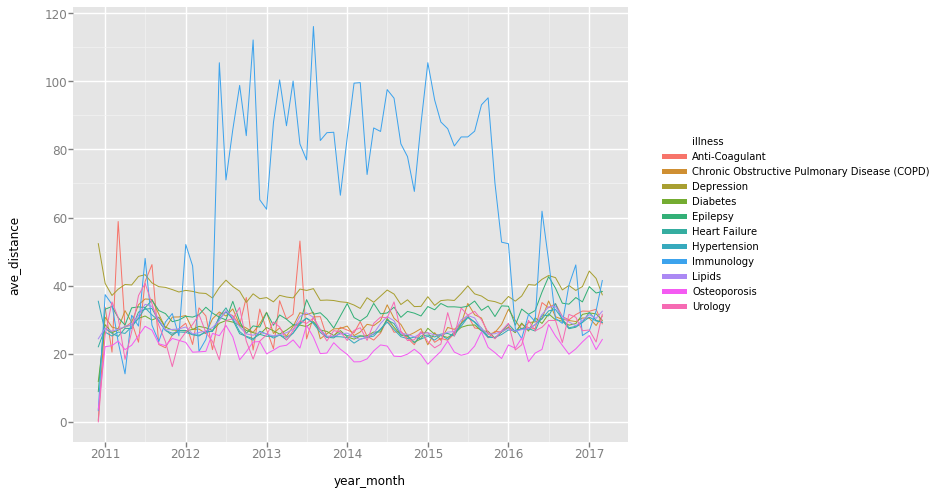

<ggplot: (278976271)>

In [5]:
df_ill['ave_distance'] = df_ill.sum_distance / df_ill.transaction_count
ggplot(
    aes(x='year_month', y='ave_distance', colour='illness'),
    data=df_ill) +\
    geom_line()

## Average price per illness
Again there is some kind of year drop that makes no sense? maybe a whole heap of people buy a whole year worth of perscriptions at the beginning of the year? Interesting how Osteoporosis has a clear decline in costs over the full period of time. Also Diabetes seems to have a sharp decline mid 2013?

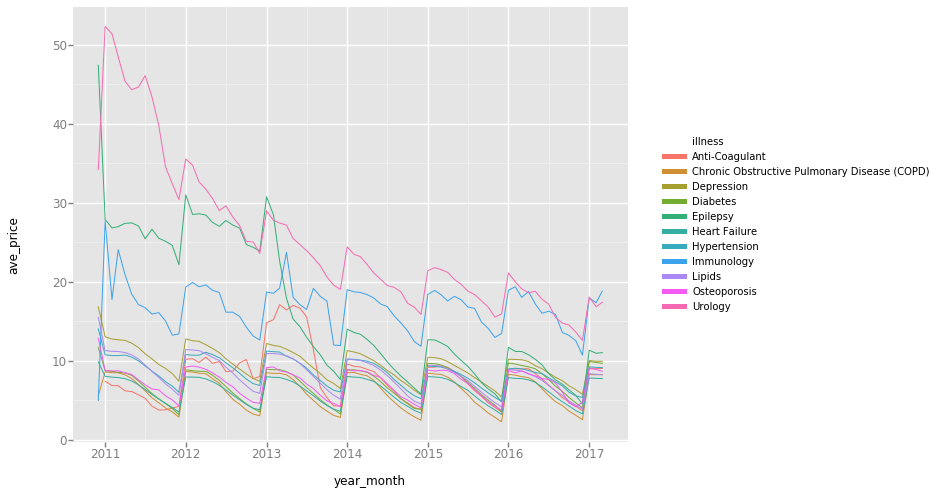

<ggplot: (-9223372036575585192)>

In [7]:
df_ill['ave_price'] = df_ill.sum_price / df_ill.transaction_count
ggplot(
    aes(x='year_month', y='ave_price', colour='illness'),
    data=df_ill) +\
    geom_line()